# Kanada’daki Evlerin Regresyon Modelleri Kullanılarak Tahmin Edilmesi

## 1- Veriyi İnceleme

### 1.1- Importlar ve Veri Setinin Yüklenmesi

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math

data = pd.read_csv('HouseListings-Top45Cities-10292023-kaggle.csv', encoding='latin1')

### 1.2- Verinin Genel Açıklaması

In [53]:
df = pd.DataFrame(data)
df

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


<span style="color: red;">City:</span> İlanların bulunduğu şehir veya büyük metropol alanı. Örneğin, Toronto, Markham, Oakville gibi çevre banliyölerden ilanları içerebilir.

<span style="color: red;">Price:</span> Kanada doları cinsinden mülkün listelenen fiyatı.

<span style="color: red;">Address:</span> İlan için sokak adresi ve varsa daire numarası.

<span style="color: red;">Number_Beds:</span> İlanda belirtilen yatak odası sayısı.

<span style="color: red;">Number_Baths:</span> İlanda belirtilen banyo sayısı.

<span style="color: red;">Province:</span> Her şehrin bulunduğu il. Not: Ottawa gibi sınır şehirleri, Gatineau gibi sınırdışı şehirlerden ilan içermez.

<span style="color: red;">Population:</span> Şehir nüfusu. simplemaps'ten alınan verilere göre (https://simplemaps.com/data/canada-cities)

<span style="color: red;">Longitude / Latitude:</span> Şehirlerin boylam ve enlem verileri, simplemaps'ten alınmıştır (https://simplemaps.com/data/canada-cities)

<span style="color: red;">Median_Family_Income:</span> Şehir için 2021 Kanada nüfus sayımından alınan ortanca hane geliri.

In [54]:
df.isnull().sum()

City                    0
Price                   0
Address                 0
Number_Beds             0
Number_Baths            0
Province                0
Population              0
Latitude                0
Longitude               0
Median_Family_Income    0
dtype: int64

### 1.3- Dağılımların İncelenmesi

Dağılımları, istendiği üzere histogramla incelemeye başlamadan önce Address kolonunu incelemeliyiz. Adres, eşsiz bir veridir ve bu kadar büyük bir veri setinde eşsiz bir veriden çok sayıda farklı girdi olacağı için bu türde bir veriyi histogramla incelemek veya plotlamak imkansız olur.

In [55]:
print(df['Address'].value_counts())

Address
#NAME?                              32
1475-1477-1479, rue Houle           12
5894 rue de la Seine                12
1014-1016-1018                      12
6980 rue de Honfleur                12
                                    ..
7944 REGENT Court                    1
2792 FIFTH ST LOUTH Street           1
6767 THOROLD STONE Road Unit# 94     1
17 Old Pine Trail                    1
208 2842-2856 Gottingen              1
Name: count, Length: 31379, dtype: int64


Görülebileceği üzere 31379 adet farklı girdi var, bunlardan en çok sayıda bulunansa "#NAME?", yani muhtemelen adresin bilinmediğini gösteren bir girdi. Bunu saymazsak en çok tekrar eden girdinin 12 adet olduğu gibi, 31379 farklı girdi tek başına bu kolonun dağılımını incelememizi zorlaştırıyor, hele histogram kullanarak. 

Şimdilik diğer kolonlara bakalım. Bin sayısını seçmek için Sturge'ün metodunu kullanacağız

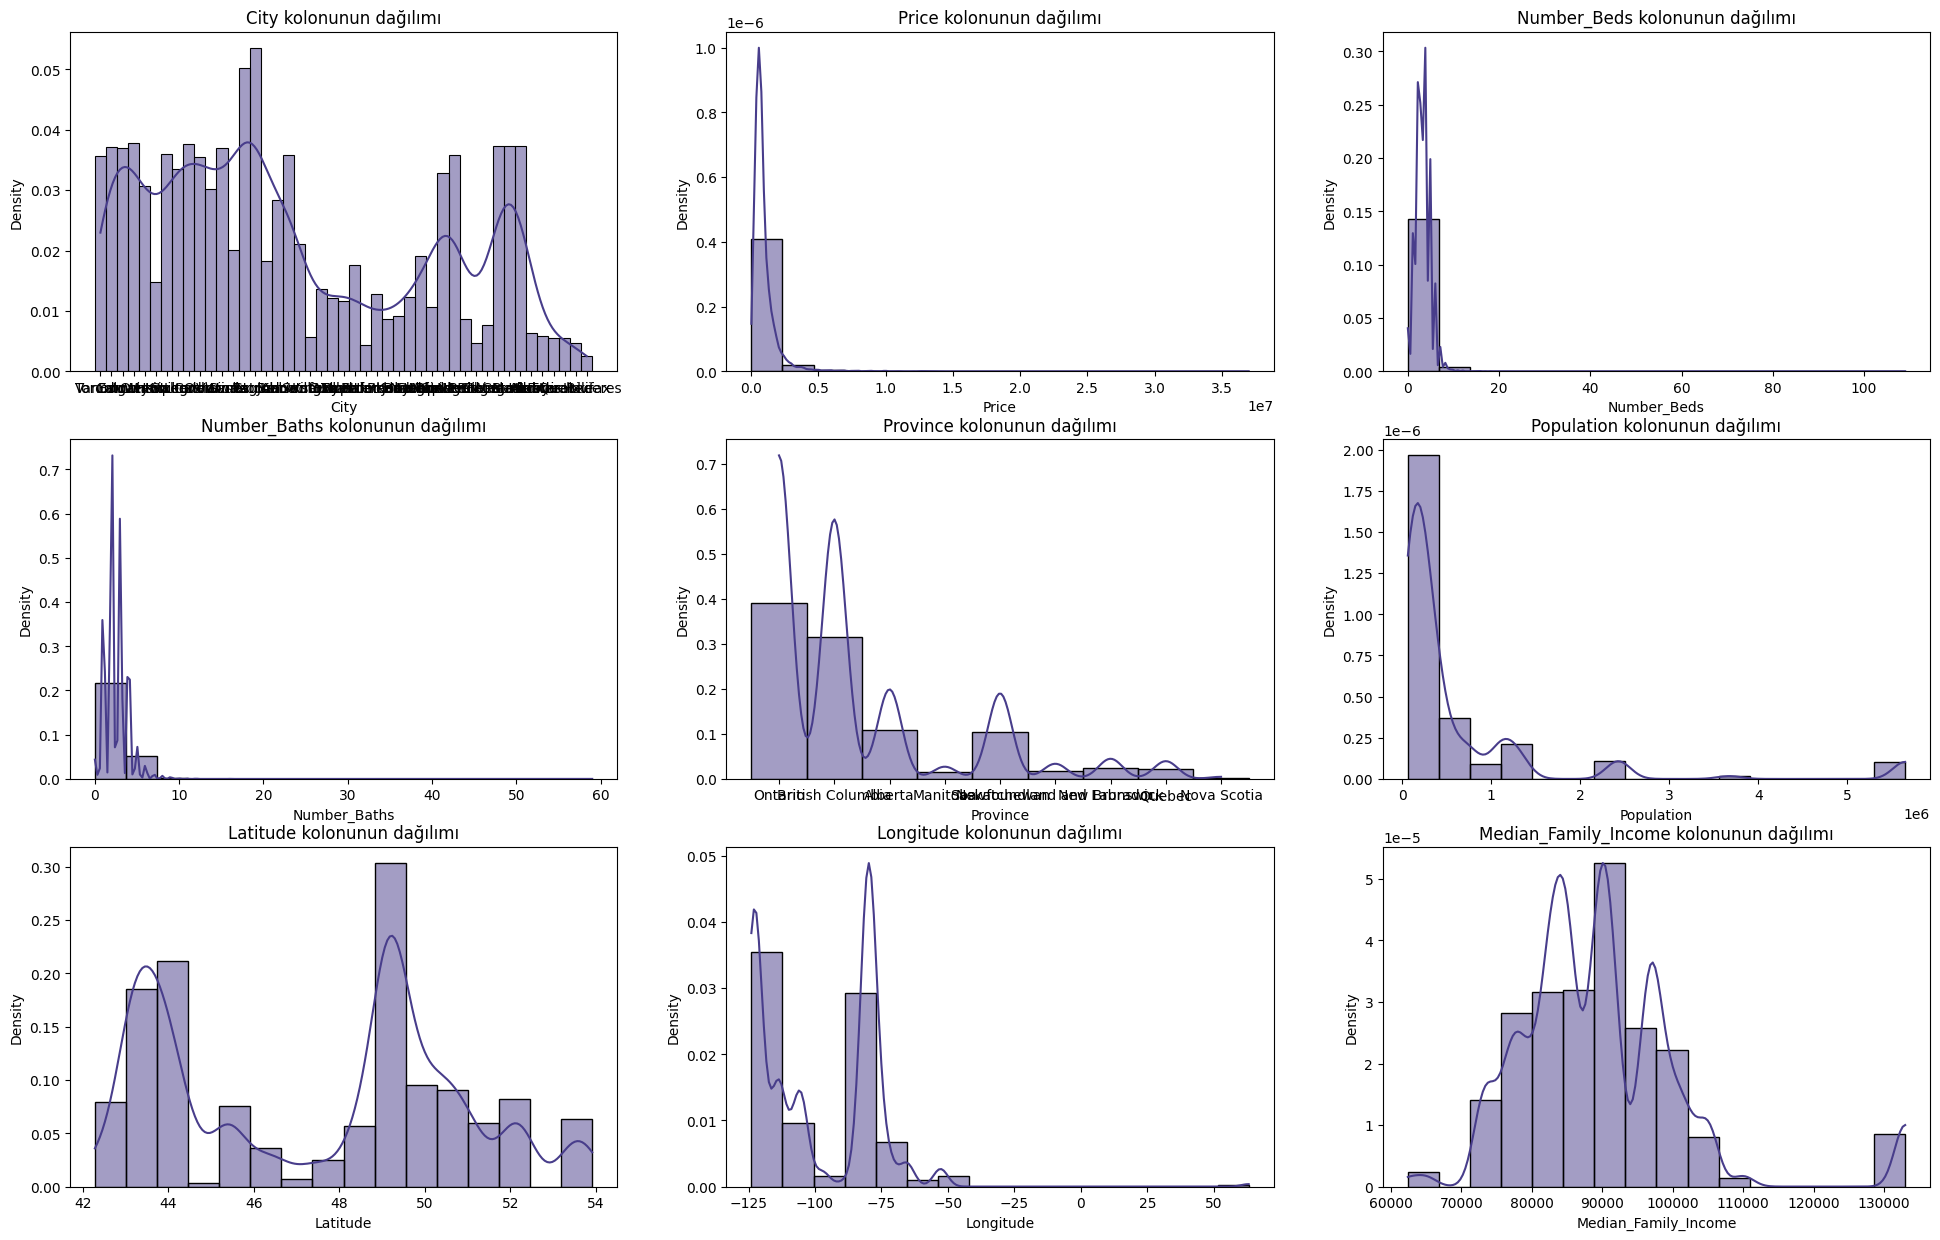

In [56]:
cols = [col for col in df.columns if col not in ['Address']]

plt.figure(figsize=(24, 15))

for i, col in enumerate(cols):
    # Sturge metodu
    bin_count = 1 + 3.3*math.log(len(data[col]), 10)
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True, color='darkslateblue', stat='density', bins=int(bin_count))
    plt.title(f"{col} kolonunun dağılımı")

İki kolonun daha histogram ile düzgün ifade edilemeyeceği görülüyor. Onlar için farklı yollar deneyeceğiz. Mesela City:

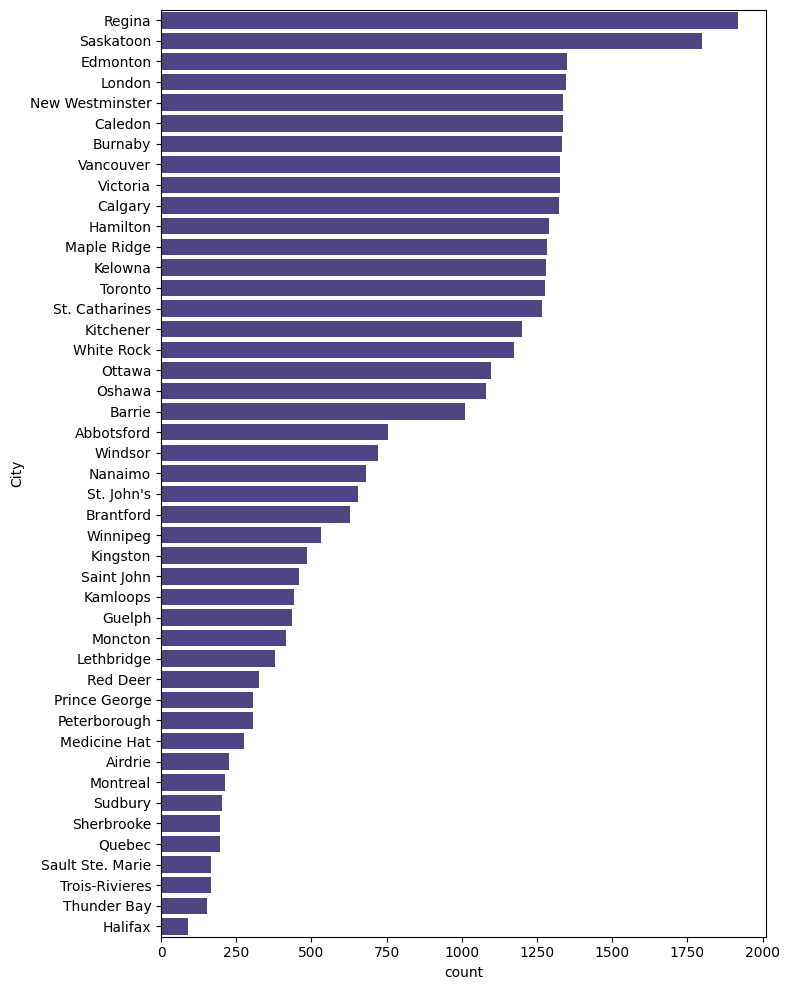

In [57]:
plt.figure(figsize=(8, 10))

sns.countplot(data=df, y='City', order=df['City'].value_counts().index, color='darkslateblue', saturation=.8)
plt.tight_layout()

Province kolonuna bakalım:

<AxesSubplot: xlabel='count', ylabel='Province'>

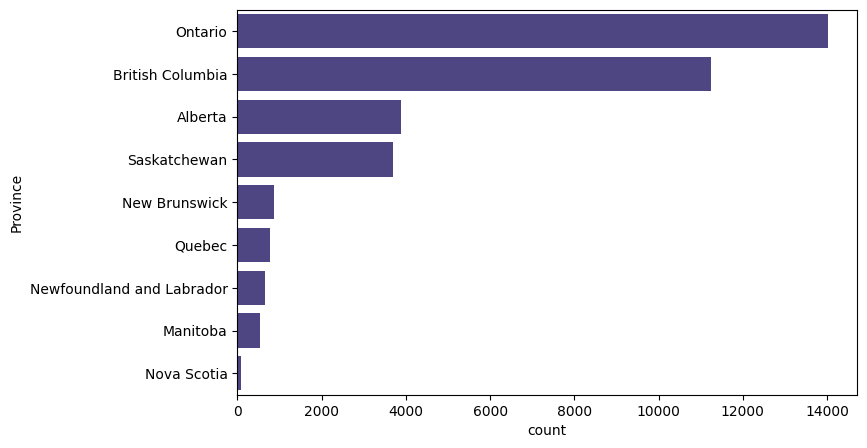

In [58]:
plt.figure(figsize=(8, 5))

sns.countplot(data=df, y='Province', order=df['Province'].value_counts().index, color='darkslateblue', saturation=.8)

Eksenleri değiştirip plotları ortak gridden çıkarmak bu iki kolonun dağılımını göstermek için işe yaramışa benziyor. Zira bu iki kolon numerik olmadığı için standart eksen düzeninde histogram ile görüntülenmeye pek uygun değil. Bu yöntemle teoride Address de plotlanabilir ancak orantısız sayıdaki eşsiz girdi yüzünden hem çok uzun sürecektir hem de incelenmesi pek de mümkün olmayan bir plot olacaktır.

Çıkarılması gereken kolonlara gelince, Address kesinlikle çıkarılmalıdır. Çünkü bu kadar fazla sayıda eşsiz değer içeren bir özelliğe one-hot encoding yapmak da, bu özelliği modele sokmak da kesinlikle verimsizdir. Bunun dışındaki kategorik özelliklere farklı yöntemler uygulanabilir.

In [59]:
df = df[cols] # başka bir iş için oluşturduğumuz değişken burada da işimize yarıyor
df

,City,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


Province ve City kolonları içinse encoding uygulanabilir.